Импорт необходимых библиотек



In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt
from google.colab import files

Запись в массив исходных данных, полученных из публичного датасета

In [ ]:
train = tfds.load("cats_vs_dogs", split=['train[:100%]'], as_supervised=True)

Проверка вывода изображения и его метаинформации



tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)


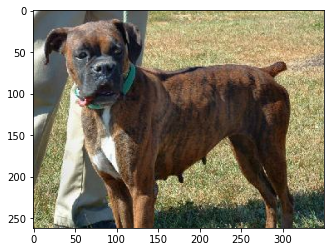

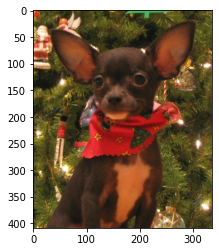

In [88]:
for img, metavalue in train[0].take(2):
  plt.figure()
  plt.imshow(img)
  print(metavalue)

Необходимо изменить разрешение картинки, для введения разрешения как константы для нейросети, что исключит возможные ошибки при обучении. Также размер 224х224 является чем-то средним между распознаваемой картинкой и совсем нераспознаваемой, что позволит получить от нейросети определенный результат и при этом сократить время обучения и обработки изображений

In [ ]:
size = 224 #нейросеть работает именно с разрешением 224х224
def image_resizing(img, metavalue):
  img = tf.cast(img, tf.float32)
  img = tf.image.resize(img, (size, size))
  img = img / 255.0 #для введения изображения в пикселях в диапазон от 0 до 1
  return img, metavalue

Применение функции изменения размера к учебному массиву и разбиение тренировочного массива на части, поскольку возможность обработки всего массива с графическими файлами напрямую зависит от системы пользователя  

In [ ]:
train_resized = train[0].map(image_resizing)
train_slices = train_resized.shuffle(1000).batch(16)

Импортирование слоевой структуры сверточной  нейросети и отказываемся от ее тренировки, поскольку алгоритм работы ей уже усвоен.

In [ ]:
base_layers = tf.keras.applications.MobileNetV2(input_shape=(size, size, 3), include_top = False)
base_layers.trainable = False

Создание модели

In [ ]:
model = tf.keras.Sequential([
                             base_layers,
                             GlobalAveragePooling2D(),
                             Dropout(0.2),
                             Dense(1)
])
model.compile(optimizer="adam", loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics =['accuracy'])

Обучение нейронной сети

In [ ]:
model.fit(train_slices, epochs=1)

1454/1454 [==============================] - 853s 587ms/step - loss: 0.0673 - accuracy: 0.9740


Загрузка пользовательской картинки, данный блок может отличаться в зависимости от среды, которую используете

In [ ]:
files.upload()

Saving 34.jpg to 34 (2).jpg


{'34.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc2\x00\x11\x08\x01R\x02X\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x01\x04\x05\x06\x00\x07\xff\xc4\x00\x1a\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xef\xa8D\xd7\x1cr\x11\x03%pcj\xdcV\xb2\xb2\xaa\x06\xa2<M\x10A\r\xb5\x84\x92x\xf1\xe2\x01<\x92\xa4\x18\xc1\xa3%j1L8!\x84\x83I*%T\xf4(Q\xeaX\x81\xd4\xd3\xd4k*\xa8\x89\x05<W\x00\xb1K2d\x05y~\xd6\x89\x91\xe6\x84\x9fL\xa2\x02\xb8\xc3\x97\x96\x02$y\xf4\\\xe7l\xa

Блок обработки пользовательского изображения и его вывод 

Text(0.5, 1.0, 'DOG [[5.5579166]]')

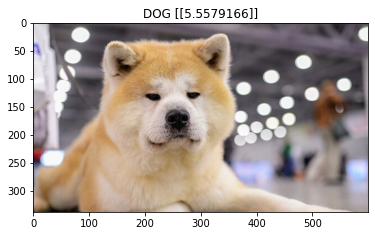

In [ ]:
new_image = load_img('34.jpg')
img_array = img_to_array(new_image)
img_resized, _ = image_resizing(img_array, _)
img_expanded = np.expand_dims(img_resized, axis = 0)
prediction = model.predict(img_expanded)
pred_label = "CAT" if prediction < 0.5 else "САБАКА СОГЛАСНЫ?"
plt.figure()
plt.imshow(new_image)
plt.title(f'{pred_label} {prediction}')

